# Apprentissage automatique

## TP 2 - Apprentissage automatique - Le Perceptron

### Génération de données synthétiques

In [51]:
# Insertion des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
#  Génération des données 2D aléatoires ayant les caractéristiques suivantes :
## nombre de données d’apprentissages : 1000 ;
nb_data_app = 1000
## nombre de données de test : 10000
nb_data_test = 1000
## x ∈ [−1, 1] et y ∈ [−1, 1] ;
## nombre de classes : 2

print(nb_data_test*nb_data_app)

1000000


In [53]:
def generateFata(app_size, test_size):

    app_data = np.random.uniform(-1,1, (app_size, 2))
    test_data = np.random.uniform(-1,1, (test_size, 2))

    ## associez des étiquettes l 
    app_label = np.zeros((app_size, 1))
    test_label = np.zeros((test_size, 1))

    app_label[:,0] = app_data[:,0] >=0
    test_label[:,0] = test_data[:,0] >=0

    return app_data, app_label, test_data, test_label

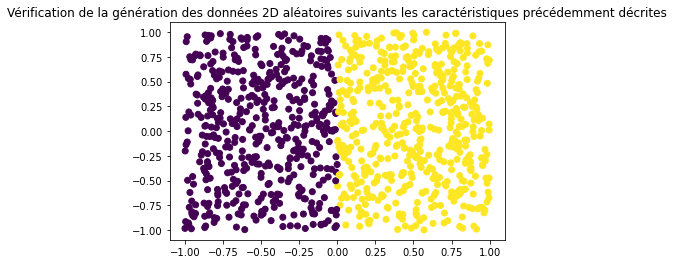

In [54]:
## test 

app_data, app_label, test_data, test_label = generateFata(1000,1000)
plt.scatter(app_data[:,0], app_data[:,1],c=app_label)
plt.title("Vérification de la génération des données 2D aléatoires suivants les caractéristiques précédemment décrites")
plt.show()

## Fonction d’activation

In [55]:
def heaviside(x):
    return (x >= 0).astype(int)

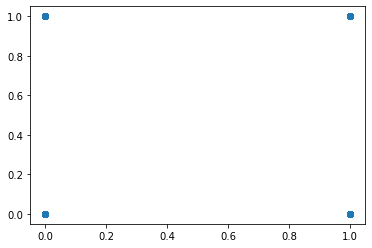

In [56]:
# test 
plt.scatter(heaviside(np.random.uniform(-1,1, 1000)),(heaviside(np.random.uniform(-1,1, 1000))))
plt.show()


## 3 - Apprentissage du réseau de neurones

In [57]:
def trainNeuralNetwork(input, output, learningRate, numberOfIterations):
    errors = np.zeros(numberOfIterations)
    # intialisation weight
    # /!\ input.shape[1] fonctionnel vs input.shape(1) non fonctionnel
    weigths = np.random.rand(input.shape[1],output.shape[1])
    #algorithm
    for i in range(numberOfIterations):
        # Compute output
        resultat = heaviside(input.dot(weigths)) # dot = produit matriciel
        # Compute error
        localErrors = output - resultat
        errors[i] = np.mean(np.sum(abs(localErrors),1)) 
        # Compute weigths
        #w[i]'=w[i]+alpha*(input[i]T*error)
        weigths += learningRate*input.transpose().dot(localErrors)
    return weigths, errors

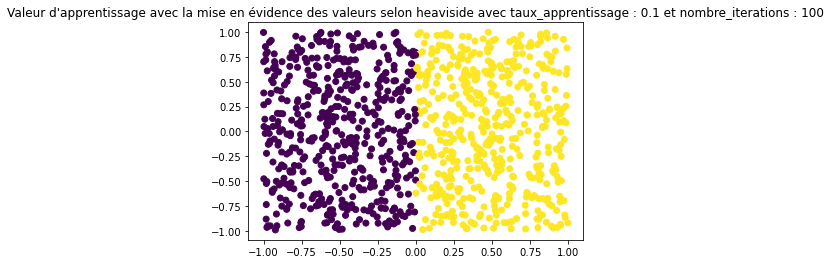

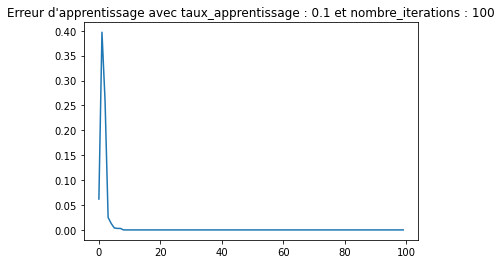

In [58]:
# mise en application  
app_data, app_label, test_data, test_label = generateFata(1000,100000)
taux_apprentissage, nombre_iterations = 0.1 , 100
weigth, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
plt.figure()
plt.scatter(app_data[:,0], app_data[:,1],c=app_label)
plt.title("")
plt.title("Valeur d'apprentissage avec la mise en évidence des valeurs selon heaviside avec taux_apprentissage : 0.1 et nombre_iterations : 100")
plt.figure()
plt.plot(errors)
plt.title("Erreur d'apprentissage avec taux_apprentissage : 0.1 et nombre_iterations : 100")
plt.show()


## 4 - Evaluation du réseau de neurones

Appliquer notre réseau de neurones sur de nouvelles données, définissez la fonction suivante : def applyNeuralNetwork(input, weights)

In [59]:
def applyNeuralNetwork(input, weights):
    output = heaviside(input.dot(weights))
    return output

Le pourcentage de réussite de label prédit par rapport au label d'entrainement est de 99.764


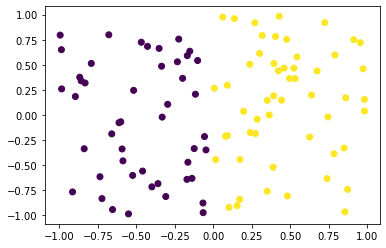

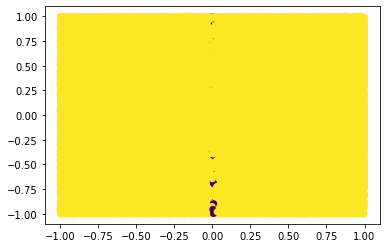

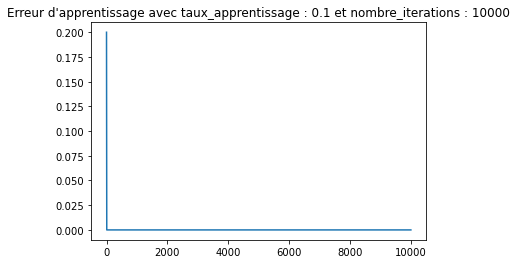

In [60]:
# test
# si on augmente app_size de generateFata, erreurs baisse,pas apparition de croix
app_data, app_label, test_data, test_label = generateFata(100,100000)
taux_apprentissage, nombre_iterations = 0.1 , 10000
weigth, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
label_predit = applyNeuralNetwork(test_data, weigth)
plt.figure()
plt.scatter(app_data[:,0], app_data[:,1],c=app_label)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=(label_predit==test_label))
print("Le pourcentage de réussite de label prédit par rapport au label d'entrainement est de",
      (100*np.sum(label_predit == test_label)/test_label.shape[0]))
plt.figure()
plt.plot(errors)
plt.title("Erreur d'apprentissage avec taux_apprentissage : 0.1 et nombre_iterations : 10000")
plt.show()


# 5 - Classification multiclasse

Avec les mêmes données que précédemment, affectez cette fois-ci deux labels l1, l2 pour chaque donnée de telle sorte que :<br><br>
l_un(x=>0)=1, l_un(x<0)=0,<br>
 l_deux(y=>0)=1, l_deux(y<0)=0

In [61]:
def generateData(numberOfOuput, app_size, test_size):
    # generate train and rest dataset
    app_data = np.random.uniform(-1,1, (app_size, 2))
    test_data = np.random.uniform(-1,1, (test_size, 2))
    
    app_label = np.zeros((app_size, numberOfOuput))
    test_label = np.zeros((test_size, numberOfOuput))
    
    app_label[:,0]=app_data[:,0]>=0
    test_label[:,0]=test_data[:,0]>=0
    
    if numberOfOuput == 2:
        app_label[:,1]=app_data[:,1] >=0
        test_label[:,1]=test_data[:,1] >=0
    return app_data, app_label, test_data, test_label
            
            

In [62]:
def displayData( data, labels):
    # display data with their labels (on color each labels)
    plt.scatter(data[:,0], data[:,1], c=labels)

le pourcentage de succès est : 99.965 %
le pourcentage d'échec est : 0.03499999999999659 %


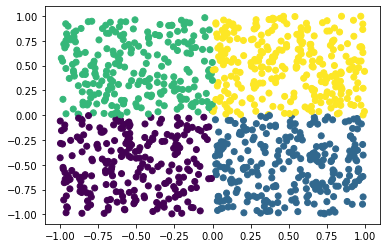

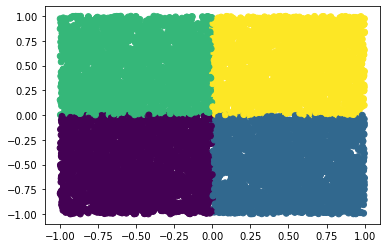

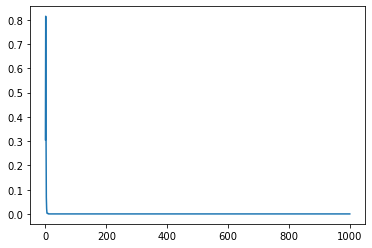

In [63]:
# test
app_size, test_size = 1000, 10000
app_data, app_label, test_data, test_label = generateData(2, app_size, test_size)
taux_apprentissage,nombre_iterations = 0.1, 1000
weigths, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
label_predit = applyNeuralNetwork(test_data, weigths)
plt.figure()
displayData(app_data, app_label[:,0] + 2*app_label[:,1])
plt.figure()
displayData(test_data, label_predit[:,0] + 2*label_predit[:,1])
print("le pourcentage de succès est :",100*np.mean(label_predit == test_label),"%")
print("le pourcentage d'échec est :",100-(100*np.mean(label_predit == test_label)),"%")
plt.figure()
plt.plot(errors)
plt.show()

# 6 - Classification des données du cancer du sein

In [64]:
# Pour ouvrir et lire le fichier :
wdbcPath="Data\WDBC\wdbc.data.txt"
wdbcData = np.genfromtxt(wdbcPath, usecols=(2, 3), delimiter=',')
wdbcLabels = np.genfromtxt(wdbcPath, usecols=1, delimiter=',',
dtype='unicode')
wdbcLabels = wdbcLabels == 'B'
wdbcLabels = wdbcLabels.astype(int).reshape((wdbcLabels.shape[0], 1))

Évaluez votre réseau de neurones sur ces nouvelles données :

In [65]:
def generateWDBCData(wdbcData, wdbcLabels):
    # 20% valeur -> test
    # generate train and rest dataset
    
    splt= int(len(wdbcData)*(80/100))
    
    app_data, test_data = wdbcData[:splt] , wdbcData[splt:]
    app_label, test_label = wdbcLabels[:splt], wdbcLabels[splt:]
    
    return app_data, app_label, test_data, test_label

77.19298245614036
77.19298245614034


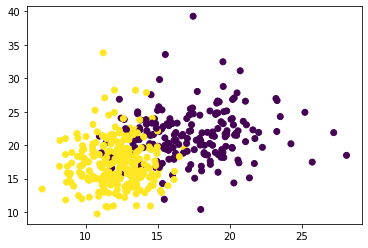

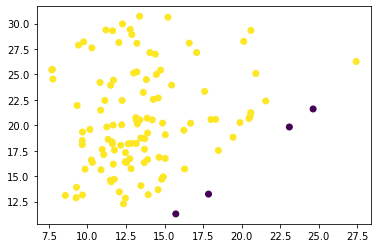

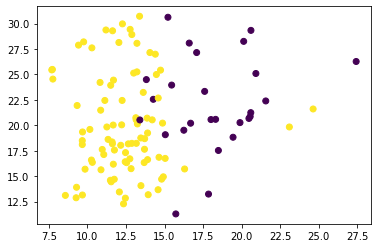

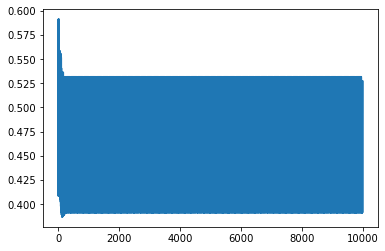

In [66]:
# test
taux_apprentissage,nombre_iterations = 0.1, 10000
app_data, app_label, test_data, test_label = generateWDBCData(wdbcData, wdbcLabels)
weigths, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
label_predit = applyNeuralNetwork(test_data, weigths)
plt.figure()
plt.scatter(app_data[:,0], app_data[:,1],c=app_label,)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=label_predit)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=(label_predit==test_label))

print(100*np.sum(label_predit == test_label)/test_label.shape[0])
print(100*np.mean(label_predit == test_label))
plt.figure()
plt.plot(errors)
plt.show()

In [67]:
def generateWCBCDataProf(wdbcPath):
    wdbcData = np.genfromtxt(wdbcPath, usecols=(2, 3), delimiter=',')
    wdbcLabels = np.genfromtxt(wdbcPath, usecols=1, delimiter=',', dtype='unicode')
    wdbcLabels = wdbcLabels == 'B'
    wdbcLabels = wdbcLabels.astype(int).reshape((wdbcLabels.shape[0], 1))
    
    #Select train and datasets
    app_data = wdbcData[::2,:]
    app_label = wdbcLabels[::2, :]
    test_data = wdbcData[1::2, :]
    test_label = wdbcLabels[1::2, :]
    return app_data, app_label, test_data, test_label

60.563380281690144
60.56338028169014


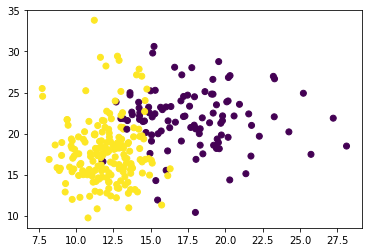

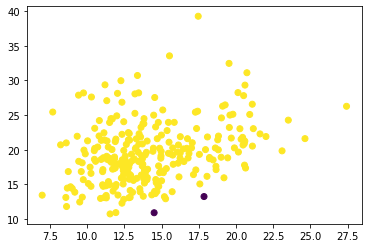

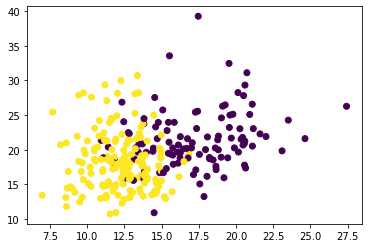

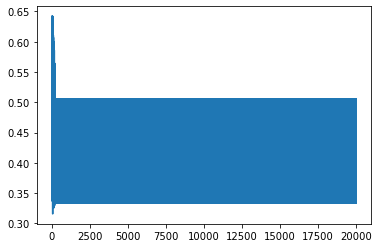

In [80]:
# test
taux_apprentissage,nombre_iterations = 0.1, 20000
app_data, app_label, test_data, test_label = generateWCBCDataProf("Data\WDBC\wdbc.data.txt")
weigths, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
label_predit = applyNeuralNetwork(test_data, weigths)
plt.figure()
plt.scatter(app_data[:,0], app_data[:,1],c=app_label,)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=label_predit)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=(label_predit==test_label))

print(100*np.sum(label_predit == test_label)/test_label.shape[0])
print(100*np.mean(label_predit == test_label))
plt.figure()
plt.plot(errors)
plt.show()

In [69]:
def generateRandomWDBCData(wdbcData, wdbcLabels):
    # 10% valeur -> test
    # generate train and rest dataset
    
    
    wdbcData_rand = np.random.shuffle(wdbcData)
    splt= int(len(wdbcData)*(90/100))
    
    app_data, test_data = wdbcData_rand[:splt] , wdbcData_rand[splt:]
    
    app_label, test_label = wdbcLabels[:splt], wdbcLabels[splt:]
    
    return app_data, app_label, test_data, test_label

In [70]:
# test
taux_apprentissage,nombre_iterations = 0.1, 10000
app_data, app_label, test_data, test_label = generateRandomWDBCData(wdbcData, wdbcLabels)
weigths, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
label_predit = applyNeuralNetwork(test_data, weigths)
plt.figure()
plt.scatter(app_data[:,0], app_data[:,1],c=app_label,)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=label_predit)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=(label_predit==test_label))

print(100*np.sum(label_predit == test_label)/test_label.shape[0])
print(100*np.mean(label_predit == test_label))
plt.figure()
plt.plot(errors)
plt.show()

TypeError: 'NoneType' object is not subscriptable

Rajout d'un biais

In [71]:
def generateWCBCDataBiais(wdbcPath):
    wdbcData = np.genfromtxt(wdbcPath, usecols=(2, 3), delimiter=',')
    biais = np.ones((wdbcData.shape[0],1))
    wdbcData = np.append(wdbcData, biais,axis=1)
    wdbcLabels = np.genfromtxt(wdbcPath, usecols=1, delimiter=',', dtype='unicode')
    wdbcLabels = wdbcLabels == 'B'
    wdbcLabels = wdbcLabels.astype(int).reshape((wdbcLabels.shape[0], 1))
    
    #Select train and datasets
    app_data = wdbcData[::2,:]
    app_label = wdbcLabels[::2, :]
    test_data = wdbcData[1::2, :]
    test_label = wdbcLabels[1::2, :]
    return app_data, app_label, test_data, test_label

77.8169014084507
77.8169014084507


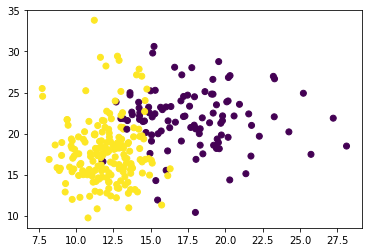

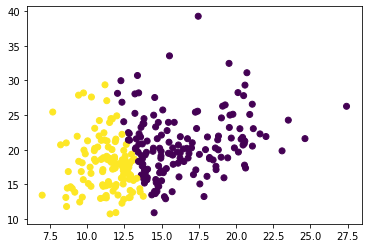

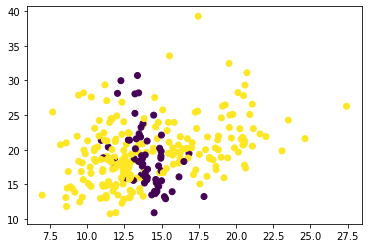

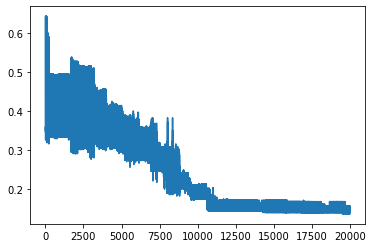

In [78]:
# test
taux_apprentissage,nombre_iterations = 0.1, 20000
app_data, app_label, test_data, test_label = generateWCBCDataBiais("Data\WDBC\wdbc.data.txt")
weigths, errors = trainNeuralNetwork(app_data, app_label,taux_apprentissage,nombre_iterations)
label_predit = applyNeuralNetwork(test_data, weigths)
plt.figure()
plt.scatter(app_data[:,0], app_data[:,1],c=app_label,)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=label_predit)
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1],c=(label_predit==test_label))

print(100*np.sum(label_predit == test_label)/test_label.shape[0])
print(100*np.mean(label_predit == test_label))
plt.figure()
plt.plot(errors)
plt.show()